     tourney_id     tourney_name surface draw_size  winner_ht  winner_age  \
0      2008-338           Sydney    Hard        32      185.0   21.555099   
1      2008-338           Sydney    Hard        32      185.0   25.070500   
2      2008-338           Sydney    Hard        32      175.0   29.609856   
3      2008-338           Sydney    Hard        32      188.0   24.145106   
4      2008-338           Sydney    Hard        32      178.0   35.077344   
5      2008-338           Sydney    Hard        32      178.0   23.819302   
6      2008-338           Sydney    Hard        32      183.0   23.630390   
7      2008-338           Sydney    Hard        32      185.0   19.895962   
8      2008-338           Sydney    Hard        32      180.0   26.866530   
9      2008-338           Sydney    Hard        32      201.0   22.439425   
10     2008-338           Sydney    Hard        32      183.0   23.028063   
11     2008-338           Sydney    Hard        32      196.0   22.305270   

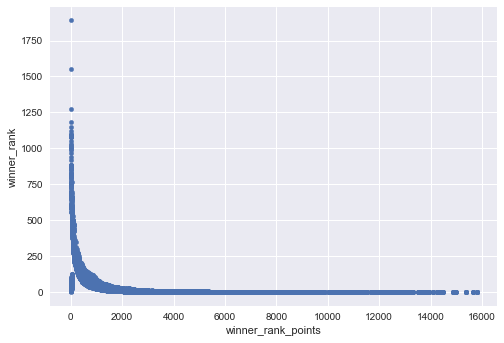

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
os.chdir("/Users/LasseLindberg/Desktop/OneDrive - Københavns Universitet/Københavnsuniversitet/Økonomi/Kandidat/8. Semester/Introduction to programming and numerical analysis/projects-2019-ccl/dataproject/Dataset/atp-matches-dataset/")

#hvis filen vi danner i forvejen findes slettes den så der kan køres en ny
if os.path.exists("Tennis_mod.csv"):
    os.remove("Tennis_mod.csv")
else:
    print('File does not exists')

#alle filer med format csv medtages og samles i tennis_total
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
Tennis_total = pd.concat([pd.read_csv(f) for f in all_filenames ])

#Vælger hvilke kolonner i tennis_total vi vil have med og danner det endelige dataset Tennis_mod
keep_col = ['tourney_id','tourney_name','surface','draw_size','winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points'] 
Tennis_mod=Tennis_total[keep_col]

filter = Tennis_mod["tourney_id"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["tourney_name"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["surface"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["draw_size"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_ht"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_age"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank_points"] != 0
Tennis_mod = Tennis_mod[filter]



#Laver tennis_mod til csv som gemmes i samme mappe med stien
Tennis_mod.to_csv( "Tennis_mod.csv", index=False, encoding='utf-8-sig')


#et stk. printet samlet tabel
print(Tennis_mod)

#et stk. deskriptiv analyse
DataDescribe=Tennis_mod.describe()
print(DataDescribe)

#et stk. OLS
results = smf.ols('winner_rank ~ winner_age + winner_ht', data=Tennis_mod).fit()
print(results.summary())

#et stk. plot
plt.style.use('seaborn')
Tennis_mod.plot(x='winner_rank_points', y='winner_rank', kind='scatter')
plt.show()